In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem #1
I will get my data from OpenPowerliting.org, the largest public data provider for powerlifting information. This page uses data from the OpenPowerlifting project, https://www.openpowerlifting.org.
You may download a copy of the data at https://gitlab.com/openpowerlifting/opl-data.
<br><br>
The first decision I had to make was between these two data sets.
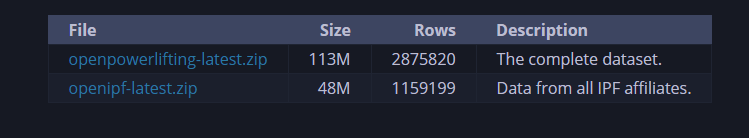
One dataset obviously has more data, which will work better via ideas like the CLT. The more data we have, the better estimates and analyses we make.
However, it is a little suspicious because the larger data set is just all powerlifting data. This means anything even remotely considered as a competition will have data here. This means casual and random events that may not be taken too seriously could skew our data.
For the reason of formality and seriousness, I will choose the smaller dataset that is data from events that comply with the International Powerlifting Federation.

## There's another problem 💊💉
Steroid use will inevitably skew our data. The binary feature of whether or not a lifter is on the juice has more impact than any other. In an ideal world, I would love to use a column named "steroids" and have a 1 or a 0. Going deeper, when the athlete used steroids also comes into play, so it's not just a simple binary classification. With all of these issues, we would love to be able to just throw steroids out of the equation.
<br><br>
The best way to do so is to use the data from the IPF, which supposedly prohibits the use of steroids.<br><br>
https://www.powerlifting.sport/anti-doping/ipf-anti-doping-rules<br><br>
But any lifter knows that it is extremely difficult to tell if someone is on steroids or not. What if the tests gave a false positive? What if they are just really strong? What if they only took a little bit years ago<br><br>
In the world of bodybuilding, powerlifting, etc., it is basically impossible to rule out the use of steroids. The best way to predict if someone is on steroids is to have heaps of data with athletes we know are on the drugs. But this is incredibly difficult, as each individual would require a lot of care and attention in just the question "Do you take steroids?" alone. People will lie, accidentally give false information, etc.

## The IPF is Good Enough
Why? Well first of all, yes steroids are an issue. But the intended purpose of this analysis is for future IPF lifters. If historical data holds, the proportion of drug use in new data will be similar to that of the data we have now. It's not like we are trying to extrapolate our data to only natural lifters. We are analyzing powerlifters FOR powerlifters. They will continue to use these steroids anyways.
<br><br>
But regardless, by choosing the IPF dataset, we remove steroid usage as a variable as much as we can.
<br><br>

https://www.powerliftingwatch.com/node/10795 <br>
"26% of the lifters who were tested at the 2008 Masters World Championships testing positive for banned substances."
<br>
It's not perfect, but at least IPF tries to limit drug usage, which is not something that could be said about the larger data set that allows data from any unorganized powerlifting events.

<br><br>
I literally looked at the FIRST entry in the larger dataset.
<div>
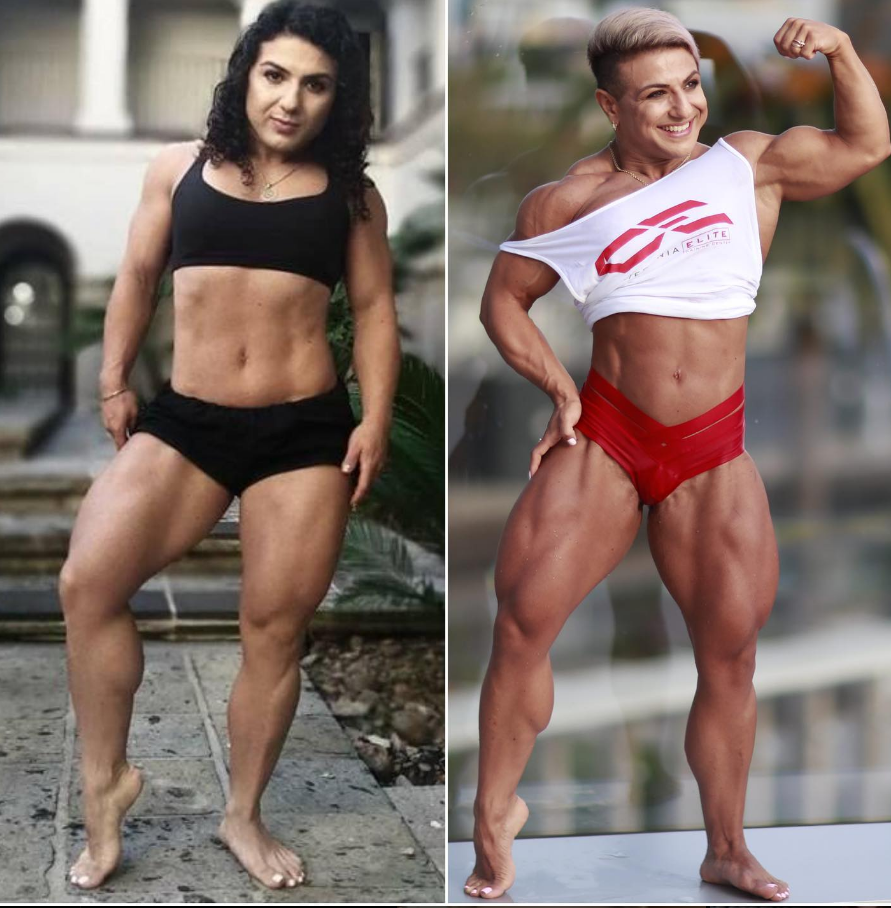
</div>
This lifter is clearly dedicated and has put in years of effort into their realm. Their work is definitely impressive and valid. Lifters should be inspired by this person. But they are clearly using steroids. Not that juicing discredits their efforts, it just skews our data in this context.
<br><br>
How many 30 year old females do you know that can bench 300 pounds?

In [15]:
df = pd.read_csv("data/openipf-2023-03-25-0091d233.csv") # Load the data

C:\Users\cderm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')

### That's alot of information!
We have a lot of info here, but we still haven't decided on a question. Let's go ahead and do that.
<br><br>
Given new information about some powerlifter, predict their Squat, Bench, and Deadlift max.

## 🎉Feature Engineering🎉
Let's go through the data and keep only the useful information.
<br><br>
Most importantly and most interestingly is how much each competitor was able to lift. The data has a column for 4 attempts at each lift for each athlete. Most commonly, lifters do not do a 4th attempt. Even if they do, it won't be considered in their "Best Lift" for that category. But what if the 4th lift was better? Our main goal is to predict how strong a new lifter will be. So, we probably should consider a lifter's 4th attempt if it was stronger than their official best.

In [26]:
# we only want lifters that competed in squat, bench, and deadliff
k = df[df['Event']=="SBD"].drop(columns=['Event'])

# We don't need the first 3 attempts for each lift anymore
k = k.drop(columns=['Squat1Kg','Squat2Kg','Squat3Kg','Bench1Kg','Bench2Kg','Bench3Kg',
               'Deadlift1Kg','Deadlift2Kg','Deadlift3Kg',])

# Take each lifter's best as the max of their official best and 4th attempt
# This will just be the highest number they pushed on that day
k['BestSquatKg'] = df[["Squat4Kg", "Best3SquatKg"]].max(axis=1)
k['BestBenchKg'] = df[["Bench4Kg", "Best3BenchKg"]].max(axis=1)
k['BestDLKg'] = df[["Deadlift4Kg", "Best3DeadliftKg"]].max(axis=1)

# We don't need the old official best or 4th attempt anymore
k = k.drop(columns=["Squat4Kg","Bench4Kg","Deadlift4Kg","Best3SquatKg","Best3BenchKg","Best3DeadliftKg"])

best_lifts = k
display(best_lifts)

,Name,Sex,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,TotalKg,...,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,BestSquatKg,BestBenchKg,BestDLKg
0,Karen Thomson,F,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,312.5,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,110.5,72.5,130.0
1,Deborah Groves,F,Single-ply,30.5,24-34,24-39,Open,50.64,52,370.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,127.5,90.0,152.5
2,Renee Orbon,F,Single-ply,31.5,24-34,24-39,Open,55.76,56,340.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,115.0,87.5,137.5
3,Rikki Flanders,F,Single-ply,31.5,24-34,24-39,Open,56.42,60,320.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,117.5,62.5,140.0
4,Julie Hallmond,F,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,316.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,112.5,62.5,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159193,Inna Orobets,F,Single-ply,45.0,45-49,40-49,Open,109.30,84+,645.0,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,242.5,187.5,215.0
1159194,Ágnes Szabó,F,Single-ply,27.5,24-34,24-39,Open,113.22,84+,632.5,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,237.5,195.0,200.0
1159195,Brenda van der Meulen,F,Single-ply,37.5,35-39,24-39,Open,110.79,84+,617.5,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,227.5,200.0,190.0
1159196,Kelly Phasey,F,Single-ply,39.5,35-39,40-49,Open,124.53,84+,515.0,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,220.0,150.0,145.0


## Oops
I kind of skipped a step out of excitement for the first feature. We just need to get rid of information we dont need for this analysis.
<br><br>

In [25]:
best_lifts

,Name,Sex,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,TotalKg,...,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,BestSquatKg,BestBenchKg,BestDLKg
0,Karen Thomson,F,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,312.5,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,110.5,72.5,130.0
1,Deborah Groves,F,Single-ply,30.5,24-34,24-39,Open,50.64,52,370.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,127.5,90.0,152.5
2,Renee Orbon,F,Single-ply,31.5,24-34,24-39,Open,55.76,56,340.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,115.0,87.5,137.5
3,Rikki Flanders,F,Single-ply,31.5,24-34,24-39,Open,56.42,60,320.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,117.5,62.5,140.0
4,Julie Hallmond,F,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,316.0,...,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,112.5,62.5,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159193,Inna Orobets,F,Single-ply,45.0,45-49,40-49,Open,109.30,84+,645.0,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,242.5,187.5,215.0
1159194,Ágnes Szabó,F,Single-ply,27.5,24-34,24-39,Open,113.22,84+,632.5,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,237.5,195.0,200.0
1159195,Brenda van der Meulen,F,Single-ply,37.5,35-39,24-39,Open,110.79,84+,617.5,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,227.5,200.0,190.0
1159196,Kelly Phasey,F,Single-ply,39.5,35-39,40-49,Open,124.53,84+,515.0,...,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,220.0,150.0,145.0
